In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Part01 - Data Wrangling
<h2>Introduction: </h2><p>
In this notebook, we are going to load the data, clean the data, and things needed to convert raw data into appropriate and valuable data or that process can be called as Data Wrangling. Data Wrangling is needed to make data more appropriate and valuable for further analysis. Beside that, we will need Exploratory Data Analysis (EDA) to draw insight that we will use in data preprocessing step. <p>
After we clean our dataset, I will do Data Mining to uncover pattern and find valuable information from our dataset. 

<em>Disclaimer: This project is not non-profit and freely accessible. This project only for learning purpose only</em>

## Problem Statement:
Before we go any further, the first thing that I will do is restate our problem statement to clarify the problems we face. This is an important thing when we want to make some Data Science Project because sometime we forget about what we want to aim in project so the results we obtain are not what we want. <p>

<ul>
    <li><strong>Statement 1: What aspects/feature are most important to prevent customer churn?</strong></li>
        <ul>
            <li>Value: The most important aspects/feature </li>
            <li>Goal: Prevent customer churn </li>
        </ul>
    <li><strong>Statement 2: How to predict customer churn before it happens in order to minimize losses due to customer churn? </strong></li>
        <ul>
            <li>Value: Chance of customer churn</li>
            <li>Goal: Minimize losses due to customer churn</li>
        </ul>
</ul> <p>

## Load Library:

In [ ]:
# Data
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer

# Analyze
from scipy.stats import shapiro, spearmanr
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Warnings
import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Load Dataset:
For our dataset, can be downloaded for free in <a href = "https://www.kaggle.com/ankitverma2010/ecommerce-customer-churn-analysis-and-prediction">Kaggle</a>. This dataset was created by <a href = "https://www.kaggle.com/ankitverma2010">Ankit Verma</a> in January 2021. Sadly, this dataset not real world dataset, but Ankit Verma had created this dataset resembles a real world dataset for learning purpose. Thanks to him. <p>
Let's load our dataset. This dataset is in excel format. There is 2 sheet that we must pay attention. "Data Dict" sheet is talking about data description and "E comm" sheet is the data we will use. To read our dataset we need pandas library

In [ ]:
dfUnc = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/EcommerceCustomerChurn/E Commerce Dataset.xlsx", sheet_name="E Comm")
dfUnc.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


In [ ]:
dfUnc.tail()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
5625,55626,0,10.0,Computer,1,30.0,Credit Card,Male,3.0,2,Laptop & Accessory,1,Married,6,0,18.0,1.0,2.0,4.0,150.71
5626,55627,0,13.0,Mobile Phone,1,13.0,Credit Card,Male,3.0,5,Fashion,5,Married,6,0,16.0,1.0,2.0,NaN,224.91
5627,55628,0,1.0,Mobile Phone,1,11.0,Debit Card,Male,3.0,2,Laptop & Accessory,4,Married,3,1,21.0,1.0,2.0,4.0,186.42
5628,55629,0,23.0,Computer,3,9.0,Credit Card,Male,4.0,5,Laptop & Accessory,4,Married,4,0,15.0,2.0,2.0,9.0,178.90
5629,55630,0,8.0,Mobile Phone,1,15.0,Credit Card,Male,3.0,2,Laptop & Accessory,3,Married,4,0,13.0,2.0,2.0,3.0,169.04


## Info Dataset:
It's very important to understand our dataset, the shape, what each feature represent, and the datatype for each feature. So let's see our dataset information before doing anything further.

In [ ]:
dfUnc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

## Explanation of Dataset:
From dataset information, we know that our data has 5630 observations and 20 features. I think our observations not too big so we need be carefull everytime we want drop some observation.<p>
Here is an explanation of our 20 dataset features:
- <strong>CustomerID</strong>: Unique customer ID
- <strong>Churn</strong>: Churn flag
    - 1: churn customer
    - 0: non churn customer
- <strong>Tenure</strong>: Tenure of customer in organization
- <strong>PreferredLoginDevice</strong>: Preferred login device of customer
- <strong>CityTier</strong>: City tier of customer
    - 1: Urban area
    - 2: Rural area
    - 3: Underdeveloped area
- <strong>WarehouseToHomeDistance</strong>: Distance in between warehouse of customer
- <strong>PreferredPaymentMode</strong>: Preferred payment method of customer
- <strong>Gender</strong>: Gender of customer
- <strong>HourSpendonApp</strong>: Number of hours spend on mobile application or website
- <strong>PreferedOrderCat</strong>: Preferred order category of customer in last month
- <strong>SatisfactionScore</strong>: Satisfactory score of customer on serivce
- <strong>MaritalStatus</strong>: Marital status of customer
- <strong>NumberOfAddress</strong>: Total number of added on particular customer
- <strong>Complain</strong>: Any complaint has been raised in last month
    - 1: made a complaint last month
    - 0: never made a complaint last month
- <strong>OrderAmountHikeFromLastYear</strong>: Percentage increase in order from last year
- <strong>CouponUsed</strong>: Total number of coupon has been used in last month
- <strong>OrderCount</strong>: Total number of orders has been places in last month
- <strong>DaySinceLastOrder</strong>: Day since last order by customer
- <strong>CashbackAmount</strong>: Average cashback in last month <p>

Each observation represent customer data. 

<em>Note: Because this data was created in January 2021, which I don't know the exact date, I will assume we are working on this project 1 day after this dataset exists</em>

## Check Missing Value:
If we look the amount data of each feature is different and not equal 5630. That means we have a missing value problem. To solve that problem, we can drop the observation that have a missing value. However as I said before, our data is not too big so we have to be carefull in drop the data so the first thing I will do is check the number of observations that have a missing value. If it's too big then we need to use another way.

In [ ]:
dfUnc.isnull().sum()

CustomerID                       0
Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64

Seems a little difficult to see, let's visualize to make it easier for us

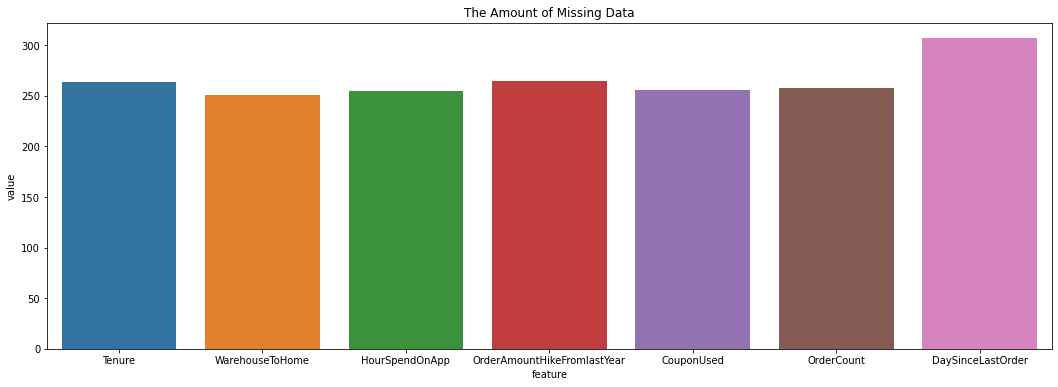

In [ ]:
# Missing data
missingData = pd.DataFrame(dfUnc.isnull().sum()[dfUnc.isnull().sum() != 0]).reset_index().rename(columns={'index':'feature', 0:'value'})

# Visualization
plt.figure(figsize=(18,6))
sns.barplot(data=missingData, x = 'feature', y = 'value')
plt.title("The Amount of Missing Data")
plt.show()

Let's check how percentange data we will drop if we chose drop missing value way

In [ ]:
missingData['value'] = round(missingData['value']/len(dfUnc)*100, 1)

missingData

,feature,value
0,Tenure,4.7
1,WarehouseToHome,4.5
2,HourSpendOnApp,4.5
3,OrderAmountHikeFromlastYear,4.7
4,CouponUsed,4.5
5,OrderCount,4.6
6,DaySinceLastOrder,5.5


In [ ]:
print(f"The percentage of data will be droped {round(len(dfUnc[dfUnc.isnull().any(axis=1)])/len(dfUnc)*100, 2)}%")

The percentage of data will be droped 32.97%


If we decided to use drop missing value, we will lose our observation as much as 32.97% so I think we can't use this way. To overcome this problem, we have another way beside drop missing value. We can use Central Tendency (mean, median, mode) from our dataset to input that missing value or we can use machine learning to predict that missing value. However to choose which way that appropriate with our data, we need to do EDA first so I will continue "Handle Missing Value Step" after I do EDA. 

## Check Duplicated Value:
Check duplicated value from our dataset as important as check missing value. Duplicated value can lead us to misleading statistics that can make us take wrong decisions so it is important for us to drop duplicated value.

In [ ]:
dfUnc.duplicated().sum()

0

Luckily our dataset has no duplicate values so we don't need to drop our observations

## Casting Data Type:
This process is useful to ensure the data type of each feature is appropriate. If something doesn't match, we have to change the data type first. On our dataset, I think there is something wrong about the data type in <strong>CityTier</strong> and <strong>Complain</strong> feature because actually they are categorical data, but they data type are Int. Therefore, I will change data type of both features becomes object. 

In [ ]:
dfUnc['CityTier'] = dfUnc['CityTier'].astype('object')
dfUnc['Complain'] = dfUnc['Complain'].astype('object')

In [ ]:
dfUnc.dtypes

CustomerID                       int64
Churn                            int64
Tenure                         float64
PreferredLoginDevice            object
CityTier                        object
WarehouseToHome                float64
PreferredPaymentMode            object
Gender                          object
HourSpendOnApp                 float64
NumberOfDeviceRegistered         int64
PreferedOrderCat                object
SatisfactionScore                int64
MaritalStatus                   object
NumberOfAddress                  int64
Complain                        object
OrderAmountHikeFromlastYear    float64
CouponUsed                     float64
OrderCount                     float64
DaySinceLastOrder              float64
CashbackAmount                 float64
dtype: object

## Incosistent Variables
After we make sure the data type, the next process is to ensure the value of our categorical data on dataset. We need to check the consistency of categorical data type values, such as <strong>PreferredLoginDevice</strong>, <strong>CityTier</strong>, <strong>PreferredPaymentMode</strong>, <strong>Gender</strong>, <strong>PreferedOrderCat</strong>, <strong>MaritalStatus</strong>, <strong>Complain</strong> feature.

In [ ]:
catFeat = ['PreferredLoginDevice', 'CityTier', 'PreferredPaymentMode', 'Gender', 'PreferedOrderCat', 'MaritalStatus', 'Complain']

for i in catFeat:
    print(f"Unique value of {i} feature: \n {dfUnc[i].unique()} \n")

Unique value of PreferredLoginDevice feature: 
 ['Mobile Phone' 'Phone' 'Computer'] 

Unique value of CityTier feature: 
 [3 1 2] 

Unique value of PreferredPaymentMode feature: 
 ['Debit Card' 'UPI' 'CC' 'Cash on Delivery' 'E wallet' 'COD' 'Credit Card'] 

Unique value of Gender feature: 
 ['Female' 'Male'] 

Unique value of PreferedOrderCat feature: 
 ['Laptop & Accessory' 'Mobile' 'Mobile Phone' 'Others' 'Fashion' 'Grocery'] 

Unique value of MaritalStatus feature: 
 ['Single' 'Divorced' 'Married'] 

Unique value of Complain feature: 
 [1 0] 



If we look <strong>PreferredLoginDevice</strong> feature, there is inconsistency value between <em>Mobile Phone</em> and <em>Phone</em> so I think we need to change <em>Phone</em> to <em>Mobile Phone</em> becauase I don't think phone can access our ecommerce apps. Same as <strong>PreferredLoginDevice</strong>, <strong>PreferedOrderCat</strong> feature have inconsistency value between <em>Mobile</em> and <em>Mobile Phone</em> so I will change <em>Mobile</em> value to <em>Mobile Phone</em>. In <strong>PreferredPaymentMode</strong> feature, this feature has more inconsistent values than the previous 2 features. There are <em>CC</em> and <em>Credit Card</em>, <em>Cash on Delivery</em> and <em>COD</em>, they are just abbreviations. Because of that, I think it will if we change the abbrevations into their real meaning, like <em>CC</em> into <em>Credit Card</em> and <em>COD</em> into <em>Cash on Delivery</em>. For the rest feature, no more inconsistent values.

In [ ]:
# PreferredLoginDevice
dfUnc['PreferredLoginDevice'] = np.where(dfUnc['PreferredLoginDevice'] == 'Phone', 'Mobile Phone', dfUnc['PreferredLoginDevice'])

# PreferedOrderCat
dfUnc['PreferedOrderCat'] = np.where(dfUnc['PreferedOrderCat'] == 'Mobile', 'Mobile Phone', dfUnc['PreferedOrderCat'])

# PreferredPaymentMode
dfUnc['PreferredPaymentMode'] = np.where(dfUnc['PreferredPaymentMode'] == 'CC', 'Credit Card', dfUnc['PreferredPaymentMode'])
dfUnc['PreferredPaymentMode'] = np.where(dfUnc['PreferredPaymentMode'] == 'COD', 'Cash on Delivery', dfUnc['PreferredPaymentMode'])

In [ ]:
catFeat = ['PreferredLoginDevice', 'CityTier', 'PreferredPaymentMode', 'Gender', 'PreferedOrderCat', 'MaritalStatus', 'Complain']

for i in catFeat:
    print(f"Unique value of {i} feature: \n {dfUnc[i].unique()} \n")

Unique value of PreferredLoginDevice feature: 
 ['Mobile Phone' 'Computer'] 

Unique value of CityTier feature: 
 [3 1 2] 

Unique value of PreferredPaymentMode feature: 
 ['Debit Card' 'UPI' 'Credit Card' 'Cash on Delivery' 'E wallet'] 

Unique value of Gender feature: 
 ['Female' 'Male'] 

Unique value of PreferedOrderCat feature: 
 ['Laptop & Accessory' 'Mobile Phone' 'Others' 'Fashion' 'Grocery'] 

Unique value of MaritalStatus feature: 
 ['Single' 'Divorced' 'Married'] 

Unique value of Complain feature: 
 [1 0] 



## Drop Unused Features:
On our dataset, there is <strong>CustomerID</strong> feature and I think that feature cannot be used for our analysis. Therefore, I will drop <strong>CustomerID</strong>.

In [ ]:
dfUnc.drop(columns='CustomerID', inplace=True)
dfUnc.columns

Index(['Churn', 'Tenure', 'PreferredLoginDevice', 'CityTier',
       'WarehouseToHome', 'PreferredPaymentMode', 'Gender', 'HourSpendOnApp',
       'NumberOfDeviceRegistered', 'PreferedOrderCat', 'SatisfactionScore',
       'MaritalStatus', 'NumberOfAddress', 'Complain',
       'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
       'DaySinceLastOrder', 'CashbackAmount'],
      dtype='object')

## Exploratory Data Analysis(EDA):
EDA is critical process of performing initial investigations on data so as to discovers patterns, spot anomalies, test hypothesis and check assumptions with the help of summary statistics and graphical representations. Basically, EDA will help us to better understand our dataset and sometimes we need graphics.

### Measure Central Tendency & Dispersion:
The first thing I will do in the EDA process is measure Central Tendecy & Dispersion of our dataset. This process is useful to see our summary statistics from our dataset quickly before we going deeper.<p>
Measure Central Tendency is useful to describe whole data with single values <sup>[1]</sup>. Central tendency consist of Mean, Median, and Mode. Mean can be intrepeted as average, Median is middle number, while mode is the value that occurs most often. Depends on our feature, each feature can be described with a different central tendency. If our feature is numerical feature, that feature can be described with mean or median. However if our feature is categorical feature, that feature is described by mode only. <p>
Measure Dispersion is useful to measure spread of data about the mean. From dispersion, we can find out the outliers of each feature. Dispersion consist of Range, Standar Deviation, and etc. <p>
Let's measure our central tendecy & dispersion from our dataset.

In [ ]:
## Numerical feature
dfUnc.describe()

,Churn,Tenure,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
count,5630.000000,5366.000000,5379.000000,5375.000000,5630.000000,5630.000000,5630.000000,5365.000000,5374.000000,5372.000000,5323.000000,5630.000000
mean,0.168384,10.189899,15.639896,2.931535,3.688988,3.066785,4.214032,15.707922,1.751023,3.008004,4.543491,177.223030
std,0.374240,8.557241,8.531475,0.721926,1.023999,1.380194,2.583586,3.675485,1.894621,2.939680,3.654433,49.207036
min,0.000000,0.000000,5.000000,0.000000,1.000000,1.000000,1.000000,11.000000,0.000000,1.000000,0.000000,0.000000
25%,0.000000,2.000000,9.000000,2.000000,3.000000,2.000000,2.000000,13.000000,1.000000,1.000000,2.000000,145.770000
50%,0.000000,9.000000,14.000000,3.000000,4.000000,3.000000,3.000000,15.000000,1.000000,2.000000,3.000000,163.280000
75%,0.000000,16.000000,20.000000,3.000000,4.000000,4.000000,6.000000,18.000000,2.000000,3.000000,7.000000,196.392500
max,1.000000,61.000000,127.000000,5.000000,6.000000,5.000000,22.000000,26.000000,16.000000,16.000000,46.000000,324.990000


In [ ]:
## Categorical Feature
dfUnc.describe(include=['O'])

,PreferredLoginDevice,CityTier,PreferredPaymentMode,Gender,PreferedOrderCat,MaritalStatus,Complain
count,5630,5630,5630,5630,5630,5630,5630
unique,2,3,5,2,5,3,2
top,Mobile Phone,1,Debit Card,Male,Mobile Phone,Married,0
freq,3996,3666,2314,3384,2080,2986,4026


From here, we can see if the numerical features we have do not seem to be normally distributed or skewed. To make sure of that, let's draw histogram plot of our numerical features.

### Histogram Plot:
Histogram is plot that used to plot the frequency of score occurances in continous data <sup>[2]</sup>. With histogram plot, we can our numerical features distribution. Knowing the distribution of our data is important thing. By knowing the distribution of data, we can take appropriate actions for data cleaning and data preprocessing.

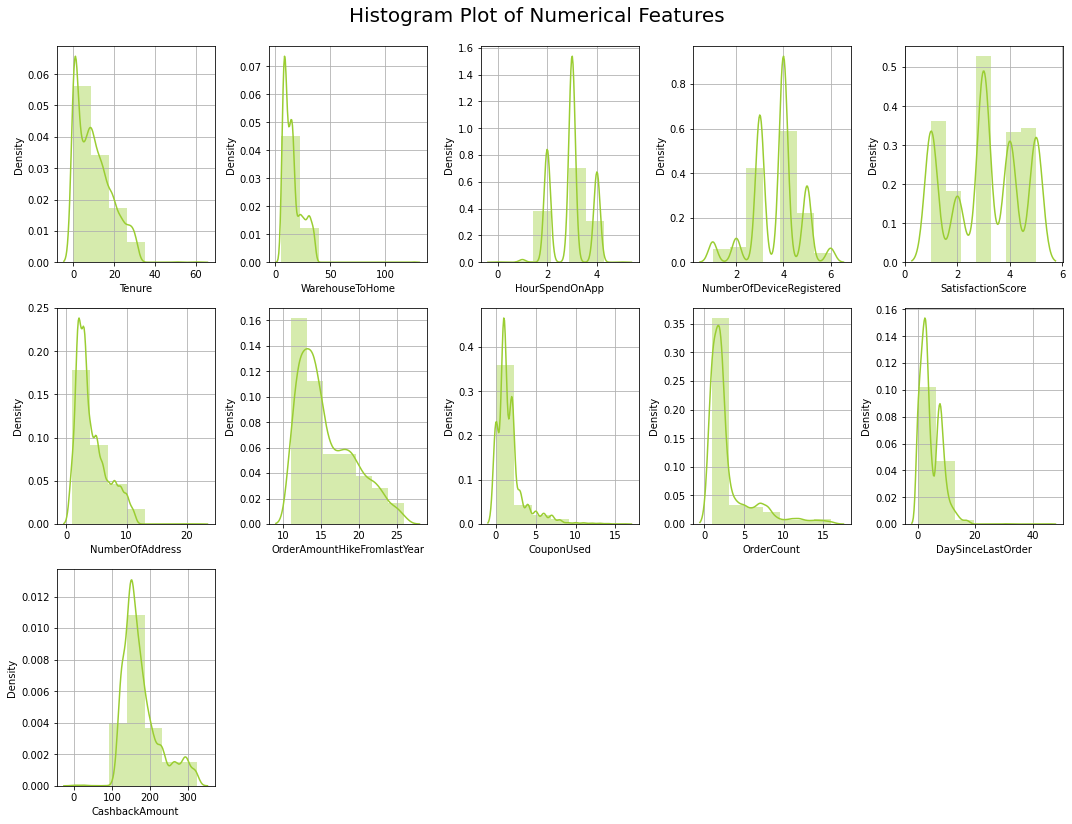

In [ ]:
numFeat = dfUnc.select_dtypes(include=np.number).columns.tolist()

fig = plt.figure(figsize = (15,12))
for index, var in enumerate(numFeat[1:]):
  ax = fig.add_subplot(3,5,index+1)
  sns.distplot(dfUnc[var], ax=ax, bins=7, color='yellowgreen')
  plt.grid(True)

fig.suptitle("Histogram Plot of Numerical Features", fontsize = 20, y = 0.98)
fig.tight_layout(rect=[0, 0.03, 1, 0.95])
fig.show()

As we can see, there are more features that left skewed in our numerical features. Left skewed is situation when the mean of our feature smaller than the median. From here, we need to use median instead of mean to desrcibed numerical features. Maybe, there is some question "What is the function of knowing that?". Knowing this, if we want to impute missing value, we can't use mean value of feature, instead we can use the median value of feature.  

### Handle Missing Value:
In this step, I will impute missing value with their median. Here are some considerations why I decided to impute missing value with median than use machine learning to predict that missing value:
- Every feature that has a missing value, the average missing value is only about 5% of the total observations. This means that our missing value is not too much and this is enough to overcome by inputting the central tendency. 
- If we look at the distribution of the data, inputting the missing value with the median will not change the distribution of the data because there are not too many missing values.

In [ ]:
imputer = SimpleImputer(missing_values=np.nan, strategy='median')

dfUnc[missingData['feature']] = imputer.fit_transform(dfUnc[missingData['feature']])

In [ ]:
print('Check if there is still a missing value: ',len(dfUnc[dfUnc.isnull().any(axis=1)]))

Check if there is still a missing value:  0


To make sure the distribution of the data doesn't change, let's redraw our histogram plot

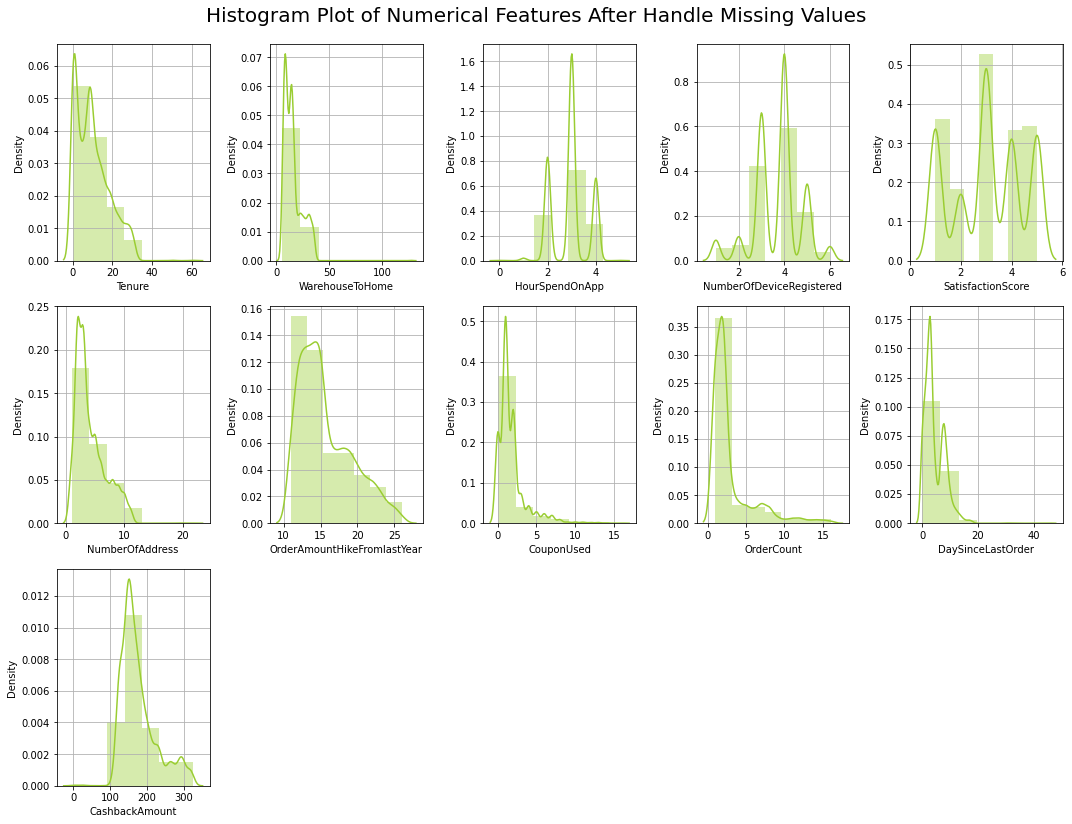

In [ ]:
numFeat = dfUnc.select_dtypes(include=np.number).columns.tolist()

fig = plt.figure(figsize = (15,12))
for index, var in enumerate(numFeat[1:]):
  ax = fig.add_subplot(3,5,index+1)
  sns.distplot(dfUnc[var], ax=ax, bins=7, color='yellowgreen')
  plt.grid(True)

fig.suptitle("Histogram Plot of Numerical Features After Handle Missing Values", fontsize = 20, y = 0.98)
fig.tight_layout(rect=[0, 0.03, 1, 0.95])
fig.show()

### Box Plot:
After we know the distribution, the next step is to detect outlier. Outlier is an observation that lies an abnormal distance from other values<sup>[3]</sup>. In statistic, outlier can be described by observation that lies below "Minimum" (Q1 - 1.5 * IQR) and above Maximum (Q3 + 1.5 * IQR). To make it easier, we can use a box plot to detect outlier. Box plot is a standardized way of displaying the dataset based on a five-number summary: the minimum, the maximum, the sample median, and the first and third quartiles. <p>
<center><img src = 'https://editor.analyticsvidhya.com/uploads/27055Box-Plot-and-Whisker-Plot-1.png' width = 500 height = 300></center>

<em>Note: IQR is stand for Interquartile Range, it's mean Q3 - Q1</em>

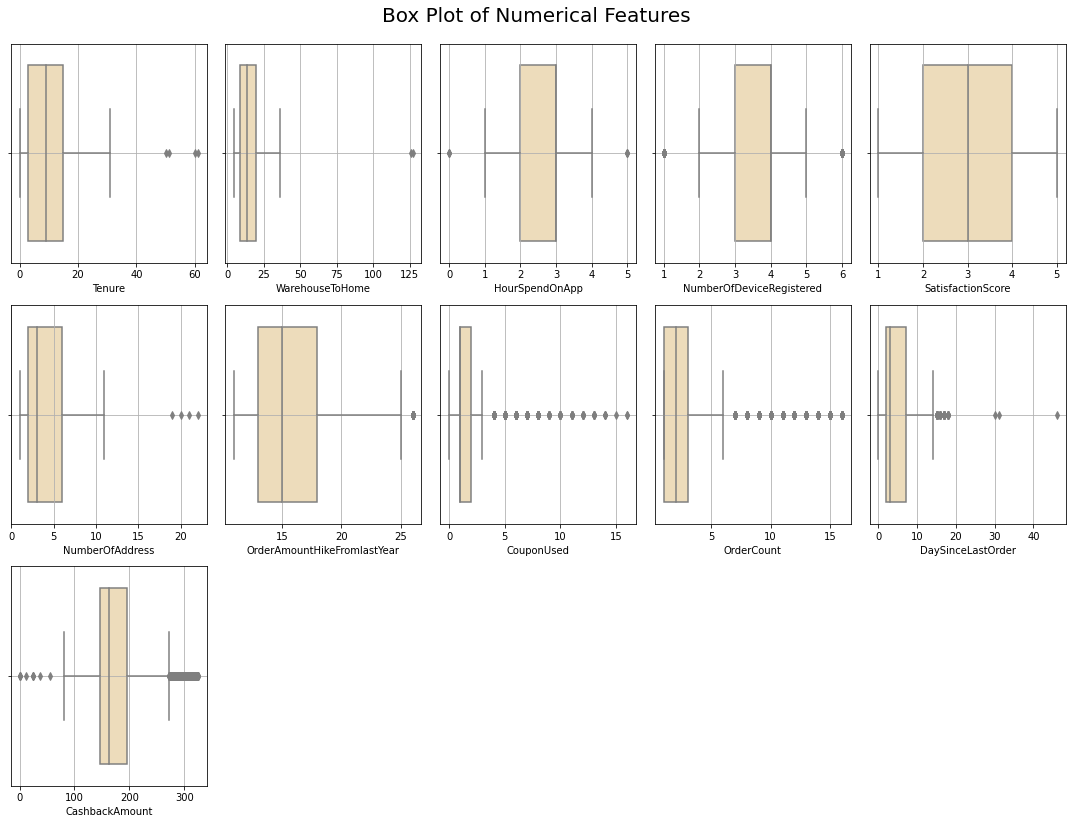

In [ ]:
fig = plt.figure(figsize = (15,12))
for index, var in enumerate(numFeat[1:]):
  ax = fig.add_subplot(3,5,index+1)
  sns.boxplot(dfUnc[var], ax=ax, color='wheat')
  plt.grid(True)

fig.suptitle("Box Plot of Numerical Features", fontsize = 20, y = 0.98)
fig.tight_layout(rect=[0, 0.03, 1, 0.95])
fig.show()

Besides <strong>SatisfactionScore</strong> feature, our features have many outlier. From here, we can draw some insight for data preprocessing later. We need to use Robust Scaler or Standar Scaler to scaling our data if needed


### Handle Outliers:
As I explained before, besides <strong>SatisfactionScore</strong> feature, our features have many outlier. To handle that outliers, we need to check whether the outlier is reasonable or not. <p>

#### HourSpendOnApp:
If we look on <strong>HourSpendOnApp</strong> feature, there is outlier that doesn't make sense for me. That outlier equals 0 which it's imposible there is customer never use our App. Maybe the customer actually uses our apps for under 1 hour, but because it is rounded the result becomes 0. Because of that, I will change that data to 1.


In [ ]:
dfUnc['HourSpendOnApp'] = np.where(dfUnc['HourSpendOnApp'] < 1, 1, dfUnc['HourSpendOnApp'])

For other features, we can't just change the outliers, we need to check their relationship with other features. <p>

#### WarehouseToHome Outliers:
To check <strong>WarehouseToHome</strong> feature outliers we can connect it to <strong>CityTier</strong>. Logically, when the <strong>CityTier</strong> is higher then the <strong>WarehouseToHome</strong> will also be higher. However when it is too high, I will replace it to the maximum.

Text(0.5, 1.0, 'WarehouseToHome Outliers before Handling Outliers')

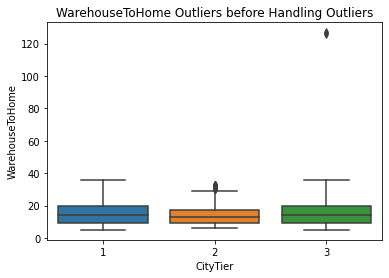

In [ ]:
sns.boxplot(x = 'CityTier', y = 'WarehouseToHome', data = dfUnc)
plt.title('WarehouseToHome Outliers before Handling Outliers')

As you can see, there is an outlier that is very far away in the <strong>CityTier</strong> = 3. For that, we will replace the outlier with its Maximum value of Interquartile.

In [ ]:
Q1 = dfUnc[dfUnc['CityTier'] == 3]['WarehouseToHome'].quantile(0.25)
Q3 = dfUnc[dfUnc['CityTier'] == 3]['WarehouseToHome'].quantile(0.75)
IQR = Q3 - Q1
max = Q3 + 1.5*IQR

dfUnc['WarehouseToHome'] = np.where((dfUnc['WarehouseToHome'] > max) & (dfUnc['CityTier'] == 3), max, dfUnc['WarehouseToHome'])

Text(0.5, 1.0, 'WarehouseToHome Outliers after Handling Outliers')

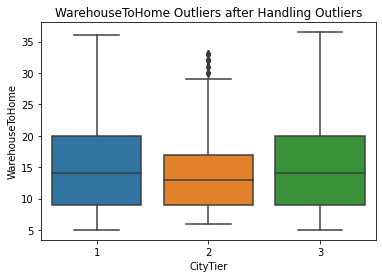

In [ ]:
sns.boxplot(x = 'CityTier', y = 'WarehouseToHome', data = dfUnc)
plt.title('WarehouseToHome Outliers after Handling Outliers')

#### Tenure and DaySinceLastOrder:
On <strong>Tenure</strong> and <strong>DaySinceLastOrder</strong> feature, they have outliers that are so far away that I will handle them in the same way as before, replacing them with the maximum value of interquartile. Even though, <strong>NumberOfAddress</strong> feature looks to have outliers that are very far from the maximum value, but I don't think this feature has anything to do with someone's churn. Therefore, I'll keep the outlier<p> 
For other features, I'll keep the outliers. Outliers are not something that we always have to replace or remove if there is no specific reason <sup>[4]</sup>. 

In [ ]:
## Tenure feature
Q1 = dfUnc[dfUnc['Churn'] == 0]['Tenure'].quantile(0.25)
Q3 = dfUnc[dfUnc['Churn'] == 0]['Tenure'].quantile(0.75)
IQR = Q3 - Q1
max = Q3 + 1.5*IQR

dfUnc['Tenure'] = np.where((dfUnc['Tenure'] > max) & (dfUnc['Churn'] == 0), max, dfUnc['Tenure'])

In [ ]:
## DaySinceLastOrder feature non churn customer
Q1 = dfUnc[dfUnc['Churn'] == 0]['DaySinceLastOrder'].quantile(0.25)
Q3 = dfUnc[dfUnc['Churn'] == 0]['DaySinceLastOrder'].quantile(0.75)
IQR = Q3 - Q1
max = Q3 + 1.5*IQR

dfUnc['DaySinceLastOrder'] = np.where((dfUnc['DaySinceLastOrder'] > 21) & (dfUnc['Churn'] == 0), max, dfUnc['DaySinceLastOrder'])


## DaySinceLastOrder feature churn customer
Q1 = dfUnc[dfUnc['Churn'] == 1]['DaySinceLastOrder'].quantile(0.25)
Q3 = dfUnc[dfUnc['Churn'] == 1]['DaySinceLastOrder'].quantile(0.75)
IQR = Q3 - Q1
max = Q3 + 1.5*IQR

dfUnc['DaySinceLastOrder'] = np.where((dfUnc['DaySinceLastOrder'] > 21) & (dfUnc['Churn'] == 1), max, dfUnc['DaySinceLastOrder'])

Let's see the summarize plot again

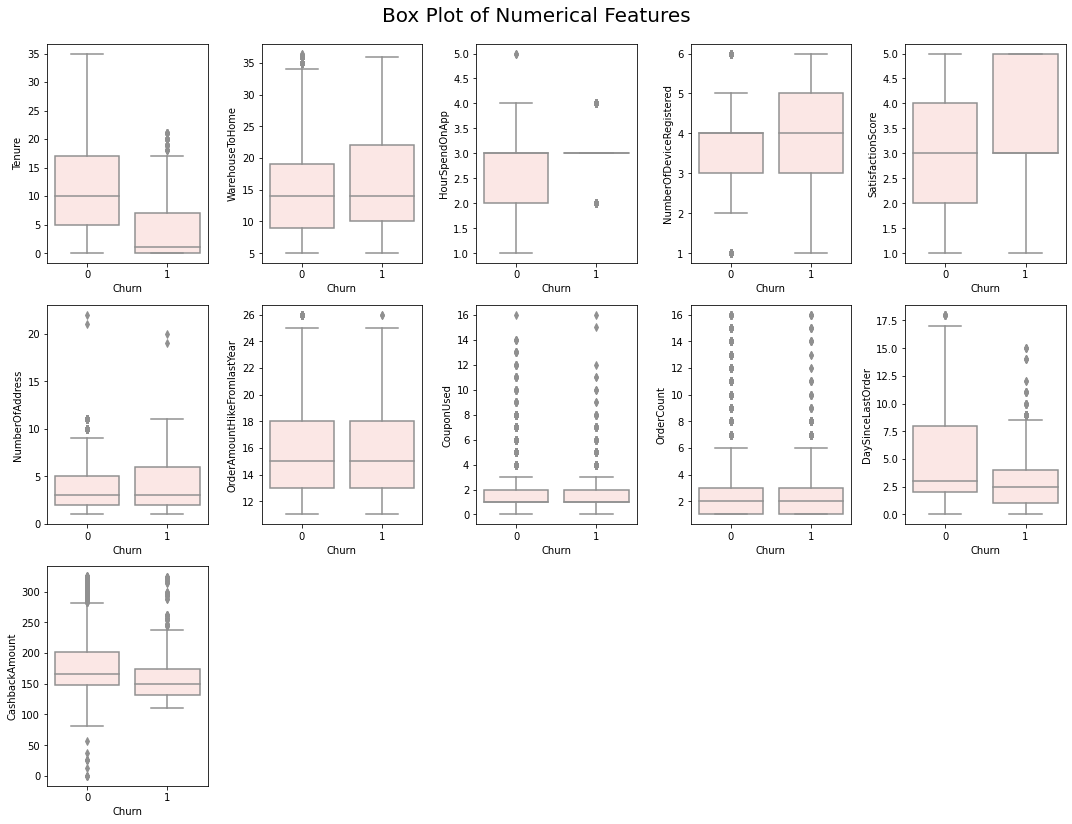

In [ ]:
fig = plt.figure(figsize = (15,12))
for index, var in enumerate(numFeat[1:]):
  ax = fig.add_subplot(3,5,index+1)
  sns.boxplot(x='Churn' , ax=ax, color='mistyrose', y = var, data = dfUnc)

fig.suptitle("Box Plot of Numerical Features", fontsize = 20, y = 0.98)
fig.tight_layout(rect=[0, 0.03, 1, 0.95])
fig.show()

#### Summary Boxplot:
Let's check outlier for other feature and see their outlier on <strong>Churn</strong> customer.

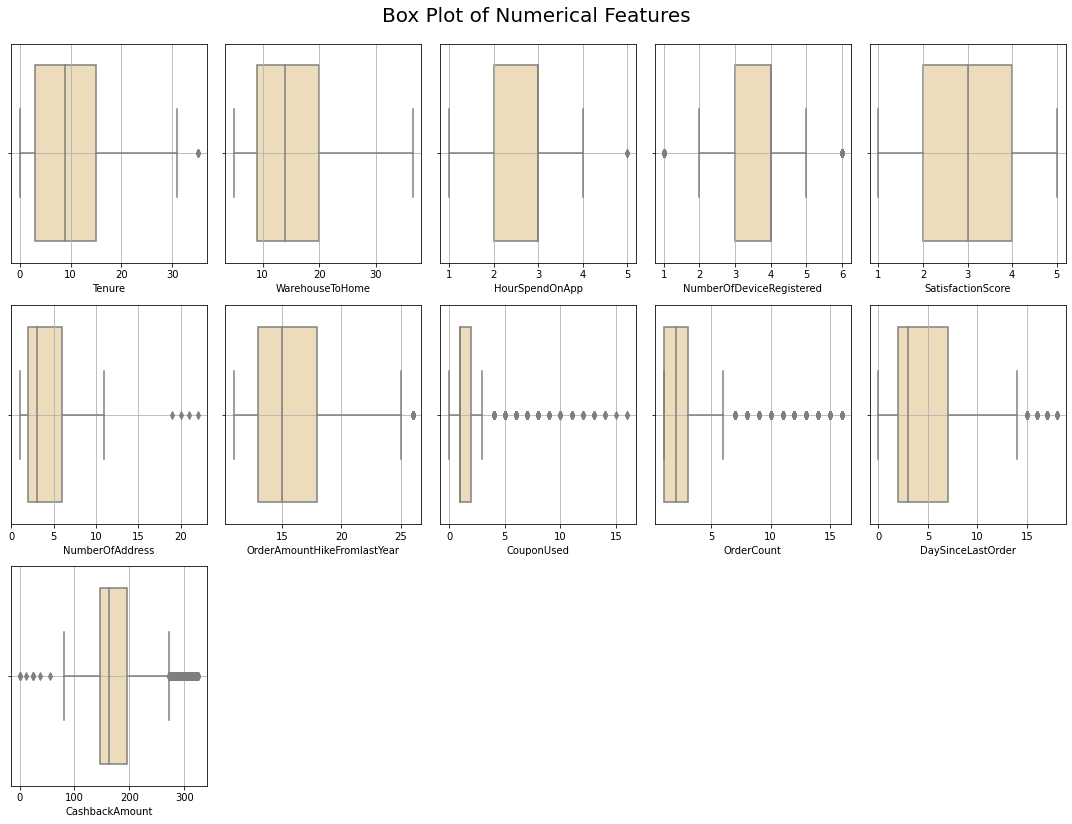

In [ ]:
fig = plt.figure(figsize = (15,12))
for index, var in enumerate(numFeat[1:]):
  ax = fig.add_subplot(3,5,index+1)
  sns.boxplot(dfUnc[var], ax=ax, color='wheat')
  plt.grid(True)

fig.suptitle("Box Plot of Numerical Features", fontsize = 20, y = 0.98)
fig.tight_layout(rect=[0, 0.03, 1, 0.95])
fig.show()

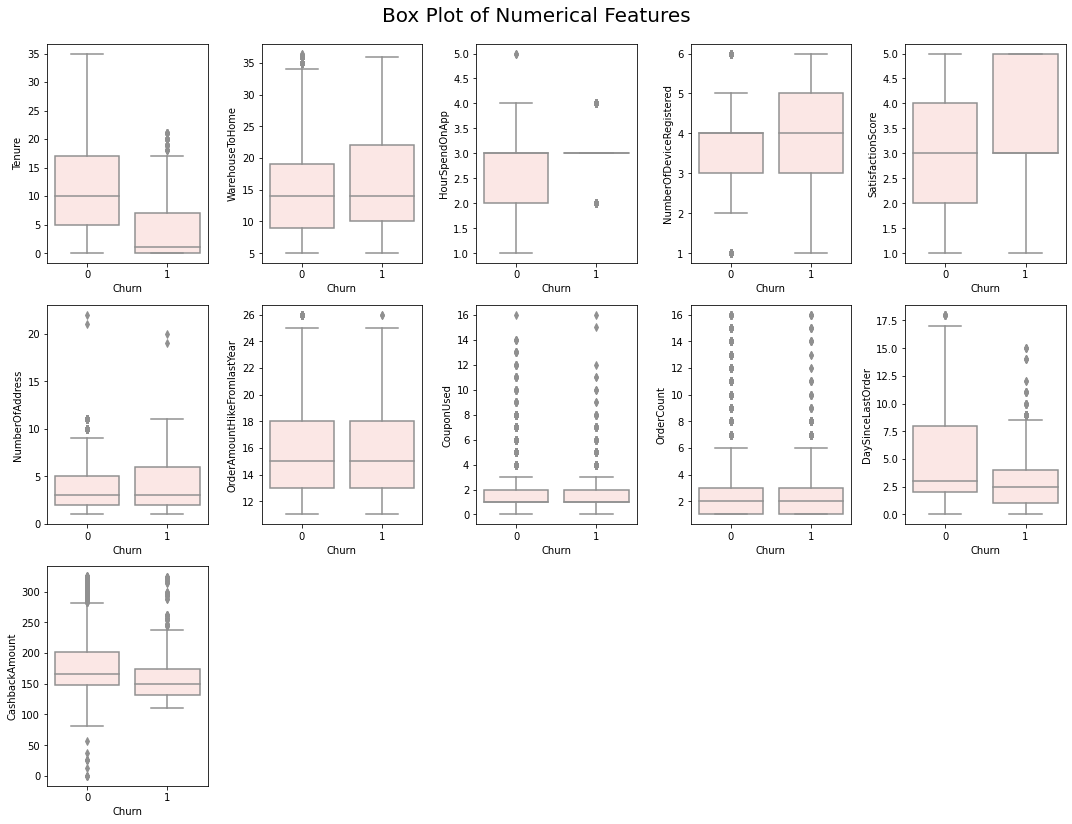

In [ ]:
fig = plt.figure(figsize = (15,12))
for index, var in enumerate(numFeat[1:]):
  ax = fig.add_subplot(3,5,index+1)
  sns.boxplot(x='Churn' , ax=ax, color='mistyrose', y = var, data = dfUnc)

fig.suptitle("Box Plot of Numerical Features", fontsize = 20, y = 0.98)
fig.tight_layout(rect=[0, 0.03, 1, 0.95])
fig.show()

Maybe some of you have a question, "Why you not remove the outlier?". With outliers, our data becomes more varied <sup>[5]</sup>. That is why we should not arbitrarily delete outliers. If it is felt that the outliers are not too far from maximum value of interquartile, the outliers must still be maintained. In addition, outliers are also common in real life so if we remove them there is a possibility when we want to create machine learning model, our model will has poor predictions of the real world.

Here summary insight for data preprocessing that we can use:
- All numerical features, except <strong>WarehouseToHome</strong>, will use Standar Scaler or Z-score because these features have outliers.

### Count Plot: 
Count plot is used to see the distribution of our categorical data.

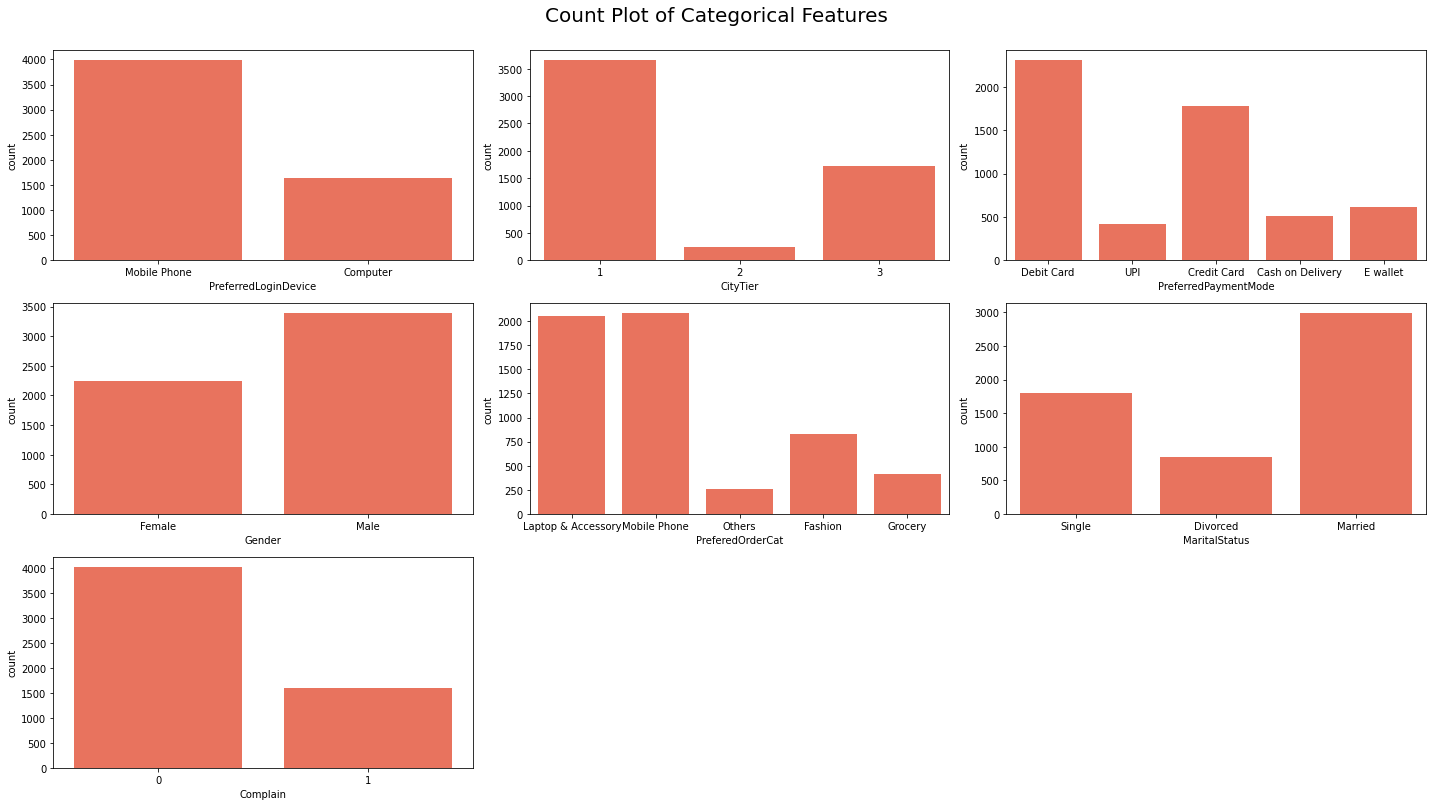

In [ ]:
catFeat = dfUnc.select_dtypes(include='object').columns.tolist()

fig = plt.figure(figsize = (20,15))
for index, var in enumerate(catFeat):
  ax = fig.add_subplot(4,3,index+1)
  sns.countplot(dfUnc[var], ax=ax, color='tomato')

fig.suptitle("Count Plot of Categorical Features", fontsize = 20, y = 0.98)
fig.tight_layout(rect=[0, 0.03, 1, 0.95])
fig.show()

Here are some insights that can be obtained: 
- Our customer perferred login use Mobile Phone than Computer, maybe we can fix the user interface of our application, but we need further analysis.
- Mostly, our customer buy Mobile Phone or Laptop & Accessory so maybe we can make marketing campaign for other product.
- Our customers tend to pay using a debit card and followed by a credit card. Meanwhile, the UPI payment method is the least used. We can work with UPI to get new customers by giving cashback to new users who use the UPI payment method. <p>

For data preprocessing:
- <strong>PreferredLoginDevice</strong>, <strong>PreferredPaymentMethod</strong>, <strong>PreferredOrderCat</strong>, <strong>Complain</strong>: we can use One hot encoding method because there are only few unique values
- <strong>CityTier</strong>: we can use Ordinal encoding method because this data have ordinal meaning


### Dependent Features Distributions:
On our dataset, <strong>Churn</strong> feature is feature that we want to predict. Before that, we need to know how is the distribution of our dependent features. Is it Balance or imbalance class?

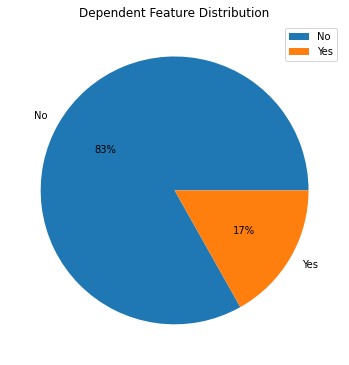

In [ ]:
depFeat = dfUnc['Churn'].value_counts()

plt.figure(figsize = (6,7))

plt.pie(depFeat, autopct='%.0f%%', labels = ['No', 'Yes'])
plt.title('Dependent Feature Distribution')
plt.legend()
plt.show()

From here, we know that we have imbalance class on our dependence feature. Therefore in modeling, we can create synthetic data using SMOTE and we can't use accuracy score to check our performance model.  

### Correlation Analysis (Bivariate Analysis):
Correlation analysis is used to measure the statistical relationship between two different features<sup>[6]</sup>. If the correlation value is close to 1, then the two features have a strong correlation and we need to investigate whether these two features have multicollinearity problems. <p>
Multicolinearity generally occurs when there are high correlations between two or more predictor variables. Usually, multicolinearity is something we want to avoid when we use multiple linear regression model. Multicolinearity in multiple linear regression can invalidate assumptions. <p>
Beside to check multicolinearity, correlation analysis can be used to impute missing value with linear model if the missing value feature has a correlation with other features. 

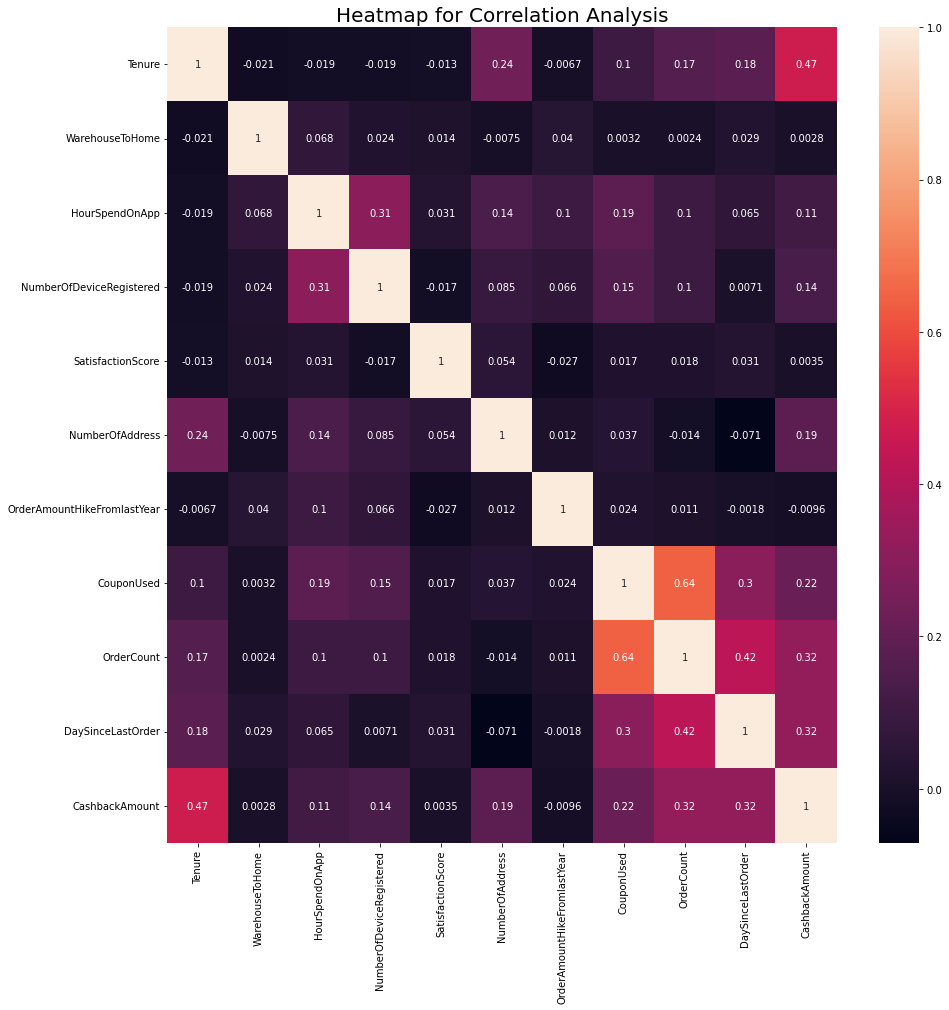

In [ ]:
plt.figure(figsize=(15,15))

sns.heatmap(dfUnc[numFeat[1:]].corr(),annot=True)
plt.title("Heatmap for Correlation Analysis", fontsize = 20)
plt.show()

In [ ]:
## Check multicolinearity
def calc_vif(x):
  vif = pd.DataFrame()
  vif['variable'] = x.columns
  vif['vif'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]

  return vif

calc_vif(dfUnc[numFeat[1:]])

,variable,vif
0,Tenure,3.368169
1,WarehouseToHome,4.542098
2,HourSpendOnApp,19.230989
3,NumberOfDeviceRegistered,14.744624
4,SatisfactionScore,5.457354
5,NumberOfAddress,4.109728
6,OrderAmountHikeFromlastYear,14.661115
7,CouponUsed,3.244248
8,OrderCount,4.024440
9,DaySinceLastOrder,3.432423


On some of the numerical features that we have, there is a multicollinearity problem, <strong></strong>. We can solve the multicollinearity problem by using PCA or by using machine learning models that can reduce multicollinearity, such as Ridge or Lasso. <p>
For now, I'm not going to do anything about it. We will handle multicollinearity later, in modelling part.

### Multivariate Analysis:
In this step, I will do multivariate analysis by using pairplot from seaborn library. Multivariate analysis useful for getting insight in the form of patterns from our dependent features.

In [ ]:
sns.pairplot(dfUnc[numFeat], hue = 'Churn')

Output hidden; open in https://colab.research.google.com to view.

As you can see, pair plot show us there is no linear pattern between features. Therefore, I think to predict customer churn we can't use linear model, such as Logistic Regression, but for learning purpose I will still try it.<p>

## Feature Engineering:
Feature Engineering is the process of transforming raw data into features that better represent the underlying problem to the predictive models<sup>[7]</sup>. On our dataset, I think <strong>SatisfactionScore</strong> feature would be better if we categorize:
- 1-2: Unhappy
- 3: Neutral
- 4-5: Happy

And after we categorize, we will drop <strong>SatisfactionScore</strong>. Beside that, I think I want to create <strong>AvgCashbackPerOrder</strong> feature which contains the average cashback earned from each order. 

In [ ]:
## Function for feature engineerin
def satisfaction(data):
  if data <= 2:
    return "Unhappy"
  elif data == 3:
    return "Neutral"
  else:
    return "Happy"

## Feature Engineering
dfUnc['Satisfaction'] = dfUnc['SatisfactionScore'].apply(satisfaction)

## Drop SatisfactionScore Feature
dfUnc.drop(columns = 'SatisfactionScore', inplace = True)

## AvgCashbackPerAmount
dfUnc['AvgCashbackPerOrder'] = dfUnc['CashbackAmount']/dfUnc['OrderCount']

## Check
dfUnc.head()

,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount,Satisfaction,AvgCashbackPerOrder
0,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,Single,9,1,11.0,1.0,1.0,5.0,159.93,Unhappy,159.93
1,1,9.0,Mobile Phone,1,8.0,UPI,Male,3.0,4,Mobile Phone,Single,7,1,15.0,0.0,1.0,0.0,120.90,Neutral,120.90
2,1,9.0,Mobile Phone,1,30.0,Debit Card,Male,2.0,4,Mobile Phone,Single,6,1,14.0,0.0,1.0,3.0,120.28,Neutral,120.28
3,1,0.0,Mobile Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,Single,8,0,23.0,0.0,1.0,3.0,134.07,Happy,134.07
4,1,0.0,Mobile Phone,1,12.0,Credit Card,Male,3.0,3,Mobile Phone,Single,3,0,11.0,1.0,1.0,3.0,129.60,Happy,129.60


# Part01 - Data Mining:
Data Mining is the process to uncover patterns and another valuable information <sup>[8]</sup>. In this part, we will try to uncover pattern of customer churn in our e-commerce and we will try to give some recommendation to prevent customer churn based on certain situation. Therefore, we will analyze customer churn relationship with our features. Because this process is still early, we will only analyze features that I consider to be related to customer churn. We will do the Data Mining process again when we want to create a machine learning model.

<em>Note: In this process I will skip features that will lead us to bias, such as <strong>Gender</strong> and <strong>MaritalStatus</strong> features</em>



## PreferredLoginDevice Analysis:
Because of my curiosity, there is some question that I want to answer, "How much customer churn is on each device?". To answer that question, Let's see what percentage of our customers churn on different devices

<Figure size 576x576 with 0 Axes>

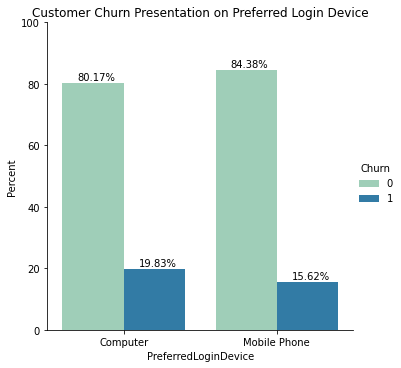

In [ ]:
dfAnz1 = dfUnc.groupby(by = ['PreferredLoginDevice'])['Churn'].value_counts(normalize = True).mul(100).rename('Percent').reset_index()

plt.figure(figsize = (8,8))
gph1 = sns.catplot(x = 'PreferredLoginDevice', y = 'Percent', hue = 'Churn', data = dfAnz1, kind = 'bar', palette= 'YlGnBu')
gph1.ax.set_ylim(0,100)

for p in gph1.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() + 0.1
    txt_y = p.get_height() + 1
    gph1.ax.text(txt_x,txt_y,txt)

plt.title('Customer Churn Presentation on Preferred Login Device')
plt.show()

In the previous insight, we found that our customers tend to prefer using mobile phones than computers and maybe this is because the user interface on the computer device is not very attractive. This is also supported by the visualization above, churn is more common in customers who use computers than mobile phones. Therefore to answer my previous question, the answer is "customer churn on computer is 19.83%, more than mobile phone, 15.62%".<p>
Recommendation action that we can take is conduct a survey on user experience and make new attractive user interface for computer device then perform A/B testing for the new user interface so we can minimize possibility of customer churn.

## Satisfaction Analysis:
Beside the device, I have a question too for satisfaction, "Does customer satisfaction affect customer churn?"

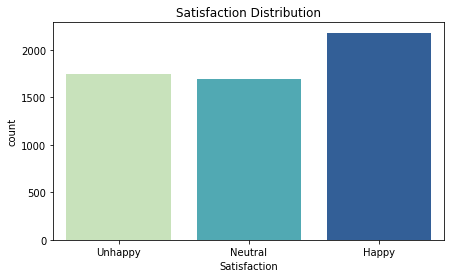

In [ ]:
plt.figure(figsize=(7,4))
sns.countplot(dfUnc['Satisfaction'], palette= 'YlGnBu')
plt.title('Satisfaction Distribution')
plt.show()

<Figure size 576x576 with 0 Axes>

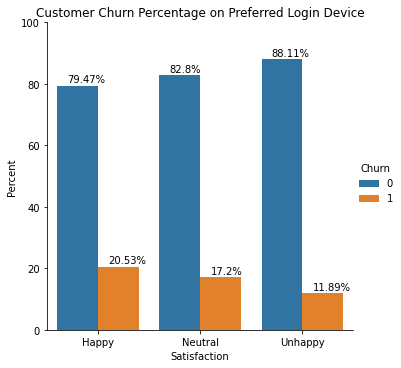

In [ ]:
dfAnz2 = dfUnc.groupby(by = ['Satisfaction'])['Churn'].value_counts(normalize = True).mul(100).rename('Percent').reset_index()

plt.figure(figsize = (8,8))
gph1 = sns.catplot(x = 'Satisfaction', y = 'Percent', hue = 'Churn', data = dfAnz2, kind = 'bar')
gph1.ax.set_ylim(0,100)

for p in gph1.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() + 0.1
    txt_y = p.get_height() + 1
    gph1.ax.text(txt_x,txt_y,txt)

plt.title('Customer Churn Percentage on Preferred Login Device')
plt.show()

As you can see, many of our customers are happy to transact in our e-commerce. However, more customer churn occurs in our happy customers. I think this is an interesting point. Supposedly, happy customers have a small chance of churn, but this is the opposite. Therefore, the conclusion we can draw is that we cannot determine the customer churn by using their satisfaction and the answer for previous question is "No".<p>
Even though the previous question has been answered, I still have my curiosity about "Why our happy customer have a greater chance of churn than others?". Because of that, I want to analyze more deeply.


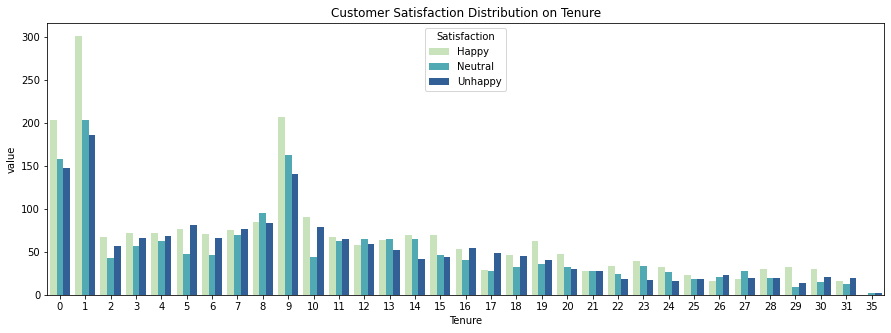

In [ ]:
dfAnz3 = dfUnc.groupby(by = ['Tenure'])['Satisfaction'].value_counts().rename('value').reset_index()
dfAnz3['Tenure'] = dfAnz3['Tenure'].astype('int')

plt.figure(figsize = (15, 5))
sns.barplot(x = 'Tenure', y = 'value', hue = 'Satisfaction', data = dfAnz3, palette = 'YlGnBu')
plt.title("Customer Satisfaction Distribution on Tenure")
plt.show()

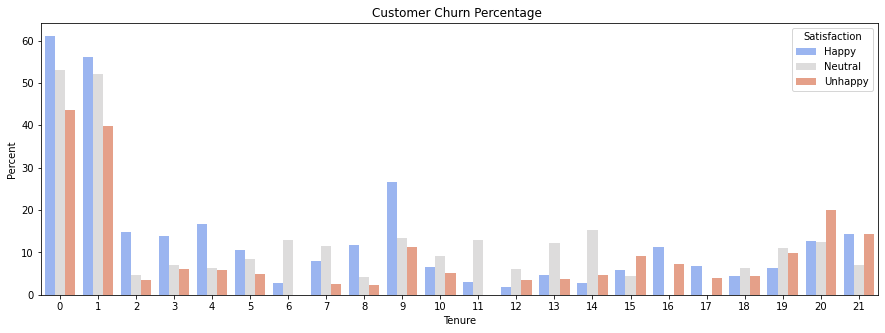

In [ ]:
dfAnz4 = dfUnc.groupby(by = ['Tenure', 'Satisfaction'])['Churn'].value_counts(normalize = True).rename('Percent').mul(100).reset_index()
dfAnz4 = dfAnz4[dfAnz4['Churn'] == 1]
dfAnz4['Tenure'] = dfAnz4['Tenure'].astype('int')

plt.figure(figsize = (15, 5))
sns.barplot(x = 'Tenure', y = 'Percent', hue = 'Satisfaction',data = dfAnz4, palette = 'coolwarm')
plt.title("Customer Churn Percentage ")
plt.show()

In the graph above, it can be seen that our happy customers are mostly in tenure 0-1 month and this is in line with the percentage of customer churn in our happy customers. This indicates that most of our customers are in the 0-1 month range. Although, they are quite happy when transacting on our e-commerce, but there is no strong enough reason for them to transact again on our e-commerce. <p>
Let's check coupons that have used by our happy customers who churn and the average cashback they get per order with their tenure to make sure my assumption. <p>
<em>Note: Because <strong>CouponUsed</strong> and <strong>CashbackAmount</strong> has outliers, we will describe by their median.</em>

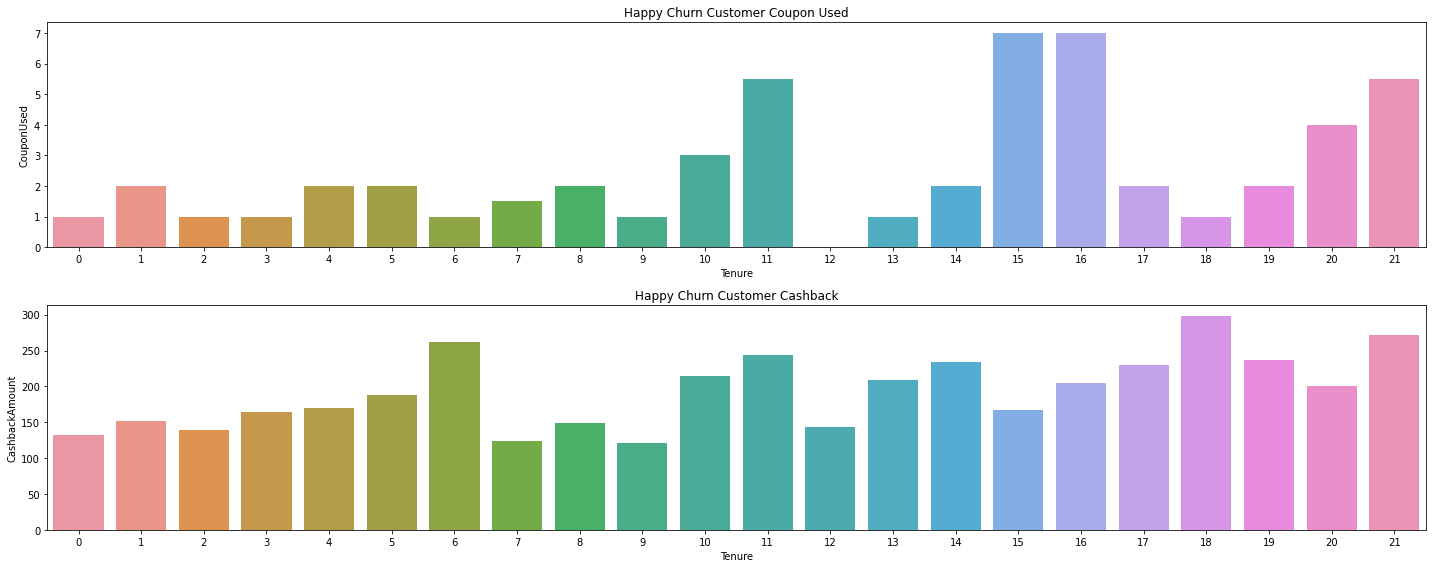

In [ ]:
dfSub1 = dfUnc[(dfUnc['Satisfaction'] == 'Happy') & (dfUnc['Churn'] == 1)]
dfSub1['Tenure'] = dfSub1['Tenure'].astype('int')

plt.figure(figsize = (20, 8))

plt.subplot(2,1,1)
sns.barplot(x = 'Tenure', y ='CouponUsed', data = dfSub1, ci = None, estimator = np.median)
plt.title("Happy Churn Customer Coupon Used")

plt.subplot(2,1,2)
sns.barplot(x = 'Tenure', y ='CashbackAmount', data = dfSub1, ci = None, estimator = np.median)
plt.title("Happy Churn Customer Cashback")

plt.tight_layout()
plt.show()

If we look at the graph above, tenure at 1 year (0 - 12 months) shows a strong positive correlation between the coupons used and the cashback earned. Meanwhile, after 1 year, the correlation decreases.

### Normal Test:
Before we do correlation test between <strong>CouponUsed</strong> and <strong>CashbackAmount</strong>, we should do normal test first to decide which method we can use for correlation test. If normally distributed, we can use Pearson method, meanwhile if not, we will use Spearmann method. 
- H0: Normally distributed
- Ha: Not normally distributed

<em>Note: The alpha level that we will use is 0.05 because this value is a commonly used value, except in the healthcare industry. Alpha level is the probability of making the wrong decision when the null hypothesis is true<sup>[9]</sup></em>

P-val from CouponUsed is: 0.0, reject h0 so not normally distributed
P-val from CashbackAmount is: 0.0, reject h0 so not normally distributed


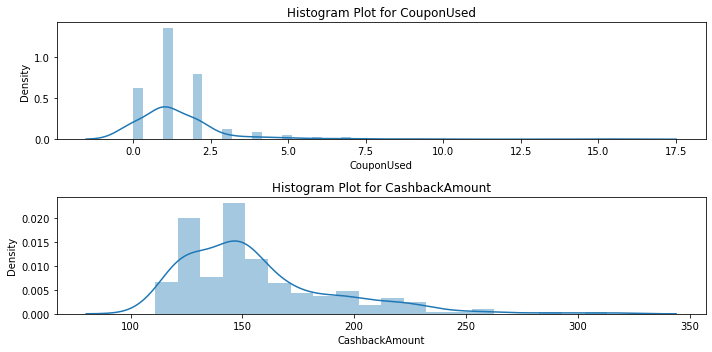

In [ ]:
## Tenure = 0 - 12 month
dfSub2 = dfSub1[dfSub1['Tenure'] < 13]

couponStats, couponPvalue = shapiro(dfSub2['CouponUsed'])
cbPtats, cbPvalue = shapiro(dfSub2['CashbackAmount'])

if couponPvalue < 0.05:
  print(f'P-val from CouponUsed is: {round(couponPvalue, 2)}, reject h0 so not normally distributed')
else:
  print(f'P-val from CouponUsed is: {round(couponPvalue, 2)}, accept h0 so normally distributed')

if cbPvalue < 0.05:
  print(f'P-val from CashbackAmount is: {round(cbPvalue, 2)}, reject h0 so not normally distributed')
else:
  print(f'P-val from CashbackAmount is: {round(cbPvalue, 2)}, accept h0 so normally distributed')

plt.figure(figsize = (10,5))

plt.subplot(2,1,1)
sns.distplot(dfSub2['CouponUsed'])
plt.title('Histogram Plot for CouponUsed')

plt.subplot(2,1,2)
sns.distplot(dfSub2['CashbackAmount'])
plt.title('Histogram Plot for CashbackAmount')

plt.tight_layout()
plt.show()

P-val from CouponUsed is: 0.0, reject h0 so not normally distributed
P-val from CashbackAmount is: 0.0, reject h0 so not normally distributed


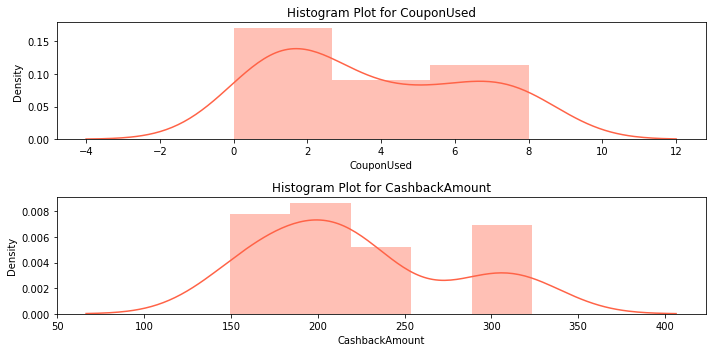

In [ ]:
dfSub3 = dfSub1[dfSub1['Tenure'] >= 13]

couponStats, couponPvalue = shapiro(dfSub3['CouponUsed'])
cbPtats, cbPvalue = shapiro(dfSub3['CashbackAmount'])

if couponPvalue < 0.05:
  print(f'P-val from CouponUsed is: {round(couponPvalue, 2)}, reject h0 so not normally distributed')
else:
  print(f'P-val from CouponUsed is: {round(couponPvalue, 2)}, accept h0 so normally distributed')

if cbPvalue < 0.05:
  print(f'P-val from CashbackAmount is: {round(cbPvalue, 2)}, reject h0 so not normally distributed')
else:
  print(f'P-val from CashbackAmount is: {round(cbPvalue, 2)}, accept h0 so normally distributed')

plt.figure(figsize = (10,5))

plt.subplot(2,1,1)
sns.distplot(dfSub3['CouponUsed'], color = 'tomato')
plt.title('Histogram Plot for CouponUsed')

plt.subplot(2,1,2)
sns.distplot(dfSub3['CashbackAmount'], color = 'tomato')
plt.title('Histogram Plot for CashbackAmount')

plt.tight_layout()
plt.show()

### Correlation Test:
Because there's not normally distributed, we will use Spearman method
- H0: There's no correlation between CouponUsed and CashbackAmount
- Ha: There's correlation between CouponUsed and CashbackAmount

In [ ]:
# Correlation Test for tenure 0 - 12 month
print(f'Correlation test for tenure 0 - 12 month: ',spearmanr(dfSub2['CouponUsed'], dfSub2['CashbackAmount']))

# Correlation Test for tenure > 12 month
print(f'Correlation test for tenure above 13 month: ',spearmanr(dfSub3['CouponUsed'], dfSub3['CashbackAmount']))

Correlation test for tenure 0 - 12 month:  SpearmanrResult(correlation=0.4259504685511541, pvalue=1.012404513733563e-19)
Correlation test for tenure above 13 month:  SpearmanrResult(correlation=-0.13238063128266597, pvalue=0.4627123497246486)


This correlation test shows that between coupon used and cashback amount our churn happy customer have correlation for 0 - 12 month, though not very strong. However after 1 year, between coupon used and cashback amount uncorrelated. The insight we can get from here is between the coupon and the amount of cashback that our customer get in the first year using our e-commerce move in tandem. This means that the more coupons they use, the more cashback they will get. However, the problem is the amount of cashback our customer get is not too much. Maybe, for that reason our happy customers still churn at the beginning of the month (0 - 1 month).

## Tenure Analysis:
In the previous analysis, we found that our happy customer mostly churn at the begining of the month. Because of that, I'm curious about the percentage of customers who churn in every month.<p> 
Let's check customer churn percentage for each tenure with data visualization.

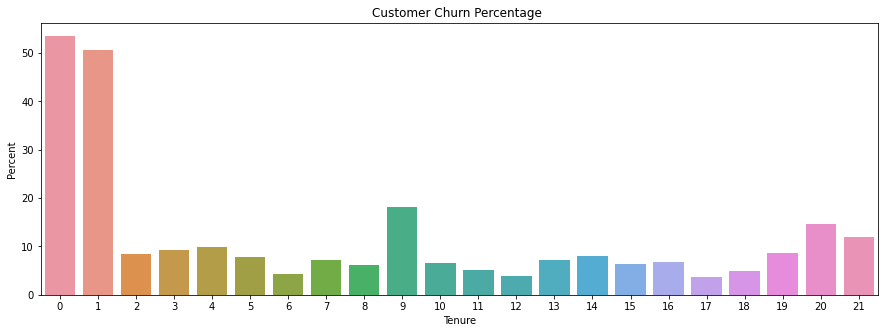

In [ ]:
dfAnz4 = dfUnc.groupby(by = ['Tenure'])['Churn'].value_counts(normalize = True).rename('Percent').mul(100).reset_index()
dfAnz4 = dfAnz4[dfAnz4['Churn'] == 1]
dfAnz4['Tenure'] = dfAnz4['Tenure'].astype('int')

plt.figure(figsize = (15, 5))
sns.barplot(x = 'Tenure', y = 'Percent', data = dfAnz4)
plt.title("Customer Churn Percentage ")
plt.show()

Customers whose tenure is in 0 - 1 month show a lot of churn, followed by the 9th month. With this analysis, now we know that we need to pay attention for new customer, especially for 0 - 1 month because mostly our customer will be churned at the begining of the month. The cause may be the same as the previous analysis, the amount of cashback obtained is not too large. <p>
Recommendation action that we can take is increase the amount of cashback that our new customers (0 - 1 month) get, with a note that the cashback can only be used on our e-commerce so our new customers want to continue transacting on our e-commerce. For other customers, we can give loyal point that can be changed to coupon for discounted shipping.

## CityTier:
After satisfaction, I want to see percentage customer churn for each city tier to answer whether the city tier affects our customer churn.

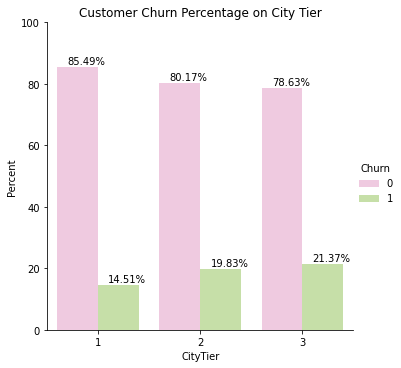

In [ ]:
dfAnz5 = dfUnc.groupby(by = ['CityTier'])['Churn'].value_counts(normalize = True).rename('Percent').mul(100).reset_index()


gph2 = sns.catplot(x = 'CityTier', y = 'Percent', hue = 'Churn', data = dfAnz5, kind = 'bar', palette='PiYG', height=5)
gph2.ax.set_ylim(0,100)

for p in gph2.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() + 0.1
    txt_y = p.get_height() + 1
    gph2.ax.text(txt_x,txt_y,txt)

plt.title('Customer Churn Percentage on City Tier')
plt.show()

Customer churn most occur in 3(underdeveloped area). I think this makes sense. The reason could be because the distance from the warehouse to the customer's house is too far so couriers often delays or it can also be due to expensive shipping costs. <p>
Recommendation action that we can take is make another warehouse that near to our customer in 3(underdeveloped area) or we can give our loyal customer in 3(underdeveloped area) coupon discounted shipping.

## PreferedOrderCat:
The last and not least, I want to see our customer churn in <strong>PreferedOrderCat</strong> feature.

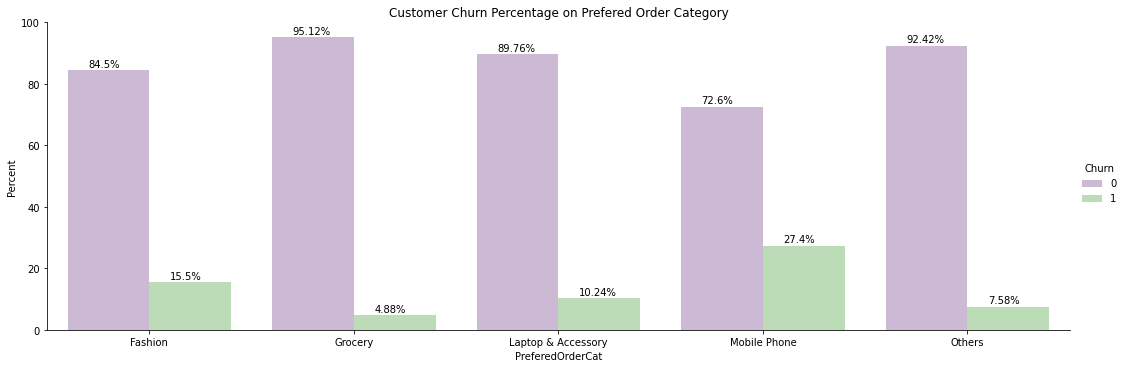

In [ ]:
dfAnz6 = dfUnc.groupby(by = ['PreferedOrderCat'])['Churn'].value_counts(normalize = True).rename('Percent').mul(100).reset_index()

gph3 = sns.catplot(x = 'PreferedOrderCat', y = 'Percent', hue = 'Churn', data = dfAnz6, kind = 'bar', palette='PRGn', height = 5, aspect = 3)
gph3.ax.set_ylim(0,100)

for p in gph3.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() + 0.1
    txt_y = p.get_height() + 1
    gph3.ax.text(txt_x,txt_y,txt)

plt.title('Customer Churn Percentage on Prefered Order Category')
plt.show()

Customer who prefered to buy mobile phone on our ecommerce shows the highest percentage of customer churn than the others. Maybe this is because people who already have mobile phone usually, rarely to buy mobile phone again in a short time so that many of our customers become churn. <p>
Recommendation action that we can take is offer another category for that customer.

## Data Mining Conclusion:
There are many factor that can make a customer churn. One of them is user interface, if our ecommerce user interface not attractive our curstomer will be churn. In our ecommerce, our customer prefer login our ecommerce with their mobile phone than computer device. This thing made me to think that our user interface on computer not attractive for our customer. To ensure my assumption, I checked percentage of customer churn of each device, mobile phone and computer. The result showed customer churn mostly happened on computer device, 19.83%, meanwhile mobile phone is 15.62%. Therefore, recommendation action that we can give is <strong>change our user interface on computer device becomes attractive user interface and don't forget to use A/B testing to make sure new user interface can have an impact in preventing customer churn.</strong> <p>
After we checked customer churn that happened on each device, I tried to uncover customer churn pattern on satisfaction customer. Sadly, satisfaction customer nothing to do with customer churn. Therefore, I checked satifaction and tenure on customer churn. The results shows mostly our happy customer will be churn on 0 - 1 month and I found that the cashback obtained from the coupon was not too big, maybe this is one of the causes of our customers even though they are quite happy they still churn. Recommendation action that we can give is <strong>increase amount of cashback for new customer (0 - 1 month), but the cashback can only be used on our e-commerce and the others customers we can give loyal point that can changed to coupon for discounted shipping. </strong> <p>
City tier also shows a relationship with customer churn. Our customer who lives in 3(underdeveloped area) tends to churn compared to other places. There is 21.37% customer churn in 3(underdeveloped area), meanwhile in 1(urban area), 14.51%, and 2(rural area), 19.83%. This could be because the distance from the warehouse to the customer's house is too far so couriers often delays or shipping costs are too expensive. Recommendation action that we can give is <strong>make another warehouse that near to our customer in 3(underdeveloped area) or we can give our loyal customer in 3(underdeveloped area) coupon discounted shipping</strong>. <p>
Our customer who prefered to buy mobile phone mostly churn, 27.4%. This is because very rarely customer will buy mobile phone again in a short time. Recommendation action that we can give is <strong> offer another items for that customer</strong>. <p>
Beside uncover pattern for our customer churn, I also found pretty good information that can increase our income. Our customer very rarely use UPI as a payment method. From here, we can work with UPI companies to create marketing campaigns to get new customers or even increase our user retention rates.


# Save Clean Data:
After we clean our dataset, we need to save it to new dataset so we can access easily.

In [ ]:
dfUnc.to_csv('/content/drive/MyDrive/Colab Notebooks/EcommerceCustomerChurn/CleanDataset.csv', index = False)

# Part01 - Summary:
After this part, we will create machine learning model that can predict customer churn so we can prevent churn before it happened. We need machine learning model because it still hard to find pattern for customer churn. Beside that, machine learning model can predict large number of customers quickly. <p>
In EDA part, I found our dataset does not show a linear pattern, but I will still try linear model. Model that I will try:
1. Logistic Regression
1. KNN
1. Decision Tree
1. Random Forest
1. XGBoost <p>

Data preprocessing very rarely is done in this section because each model has a different way of preprocessing. Therefore, that a lot of data preprocessing will be done in the next part. Data preprocessing that must be considered in the next step:
- Scaling for numerical features (Only for Logistic Regression and KNN)
- Encoding for categorical features
- Oversampline SMOTE for handling imbalance class
- Etc.


# Source:
<sup>[1]</sup> https://statistics.laerd.com/statistical-guides/measures-central-tendency-mean-mode-median.php#:~:text=A%20measure%20of%20central%20tendency,within%20that%20set%20of%20data.&text=The%20mean%20 <p>
<sup>[2]</sup> https://statistics.laerd.com/statistical-guides/understanding-histograms.php#:~:text=The%20major%20difference%20is%20that,ordinal%20and%20nominal%20data%20sets <p>
<sup>[3]</sup> https://www.itl.nist.gov/div898/handbook/prc/section1/prc16.htm <P>
<sup>[4]</sup> https://www.theanalysisfactor.com/outliers-to-drop-or-not-to-drop/ <P>
<sup>[5]</sup> https://towardsdatascience.com/outlier-why-is-it-important-af58adbefecc <p>
<sup>[6]</sup> https://www.uv.es/visualstats/vista-frames/help/lecturenotes/lecture11/overview-ovrh.html <p>
<sup>[7]</sup> https://machinelearningmastery.com/discover-feature-engineering-how-to-engineer-features-and-how-to-get-good-at-it/ <p>
<sup>[8]</sup> https://www.ibm.com/cloud/learn/data-mining <p>
<sup>[9]</sup> https://www.statisticshowto.com/probability-and-statistics/statistics-definitions/what-is-an-alpha-level/ <p>
